In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/changeDEEPly/data/train.csv')
#df_course = pd.read_csv('/content/drive/MyDrive/changeDEEPly/data/course_info.csv')
#df_course.shape
#df_user = pd.read_csv('/content/drive/MyDrive/changeDEEPly/data/user_info.csv')
#df_user.shape
#df = df.drop(['Unnamed: 0','enroll_id','object'],axis =1)
#df_merged = df.merge(df_course,on = 'course_id')
#df_merged.shape
#df_merged = df_merged.drop(['course_id','course_type'],axis = 1)
#df_merged.shape
#df_merged.shape
#df_user = df_user.rename(columns = {'user_id':'username'})
#df_final = df_merged.merge(df_user,on = 'username', how= 'left')
#df_final.shape

In [ ]:
#saved the dataframe on the drive
#df_final.to_csv('/content/drive/MyDrive/changeDEEPly/data/df_final.csv')

In [3]:
#load the dataframe
df = pd.read_csv('/content/drive/MyDrive/changeDEEPly/data/df_final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df = df.dropna()

In [6]:
df.shape

(8322174, 12)

In [7]:
df.isnull().sum()

username      0
session_id    0
action        0
time          0
truth         0
id            0
start         0
end           0
category      0
gender        0
education     0
birth         0
dtype: int64

In [8]:
df.to_csv('/content/drive/MyDrive/changeDEEPly/data/df_full.csv')

In [9]:
df.shape

(8322174, 12)

In [10]:
#find unique values
df.nunique()

username        14297
session_id      81687
action             22
time          5453013
truth               2
id                245
start             140
end               175
category           17
gender              2
education           7
birth              79
dtype: int64

In [ ]:
#explore different values of birth and education
df.education.unique()

array(["Master's", nan, 'Associate', 'High', "Bachelor's", 'Middle',
       'Doctorate', 'Primary'], dtype=object)

In [ ]:
#plot the users based on year of birth
df.birth.unique()

array([1989.,   nan, 1981., 1992., 1983., 1994., 1993., 1972., 1995.,
       1991., 1988., 1986., 1990., 1996., 1966., 1984., 1975., 1985.,
       1977., 1987., 1982., 1998., 1973., 1976., 1978., 2014., 1997.,
       1980., 1979., 1971., 2000., 1968., 1965., 1897., 1974., 1896.,
       2013., 1964., 2016., 1969., 1950., 2001., 1948., 1999., 1957.,
       1963., 1960., 2005., 1956., 1944., 1958., 1961., 1970., 1967.,
       1955., 1898., 1962., 1959., 2002., 2012., 2015., 1952., 1954.,
       2004., 2007., 2017., 1940., 2003., 2006., 1946., 2010., 1953.,
       1935., 1938., 1945., 1894., 2011., 1939., 2008., 2018., 1899.,
       2009., 1895.])

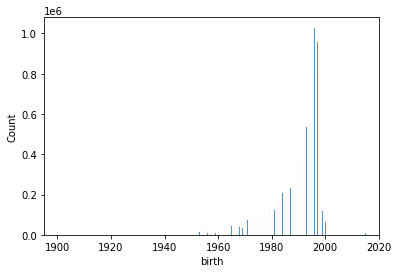

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(1895.,2020.)
sns.histplot(df.birth.dropna(),ax=ax)

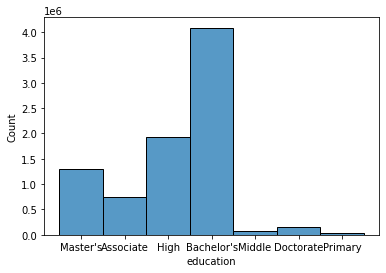

In [11]:
#plot education
sns.histplot(df.education.dropna())

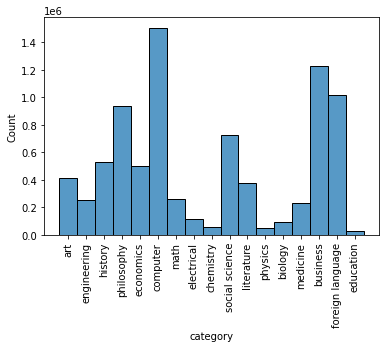

In [15]:
#plot category available
plt.xticks(rotation = 90)
sns.histplot(df.category)

In [16]:

# find the completed courses as per the category
t = df[df['truth'] == 0]


In [20]:
# find the dropout courses as per the category
t_1 = df[df['truth'] == 1]

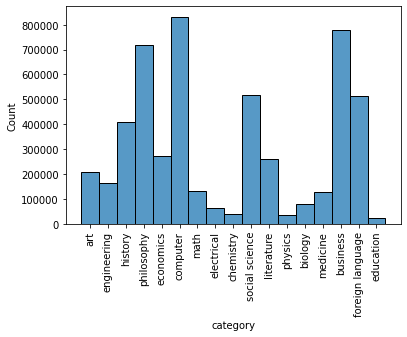

In [17]:
#plot category availablefor all completed courses
plt.xticks(rotation = 90)
sns.histplot(t.category)

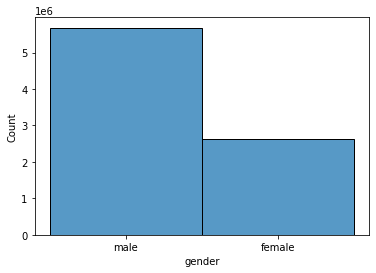

In [13]:
#plot gender who enrolled into course
sns.histplot(df.gender)

In [19]:
# percentage of completion wrt number of users enrolled for all courses
p_Completion_courses = len(t)/len(df)
p_Completion_courses


0.6204824604724679

In [22]:
# percentage of drouputs wrt number of users enrolled for all courses
p_dropout_courses = len(t_1)/len(df)
p_dropout_courses


0.3795175395275321

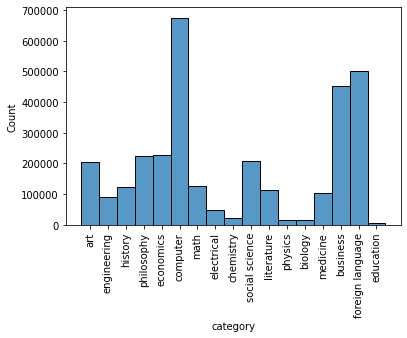

In [21]:
#plot category where there were dropouts
plt.xticks(rotation = 90)
sns.histplot(t_1.category)

In [24]:
df.dtypes

username        int64
session_id     object
action         object
time           object
truth           int64
id              int64
start          object
end            object
category       object
gender         object
education      object
birth         float64
dtype: object

In [26]:
df['Datetime'] = pd.to_datetime(df['time'])

In [27]:
df = df.drop(['time'], axis = 1)

In [28]:
## try to convert datetime to timestamp 
df['timestamp'] = df.Datetime.values.astype(np.int64) // 10 ** 9

In [29]:
df = df.drop(['Datetime'], axis = 1)

In [30]:
df = df.sort_values(['timestamp'])

In [31]:
df['timediff'] = pd.DataFrame(df.groupby('username').timestamp.diff().fillna(0))
df.head()

,username,session_id,action,truth,id,start,end,category,gender,education,birth,timestamp,timediff
7084339,24057,df8ec8baa5af2f61e5426307be9a5e75,load_video,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436084,0.0
7084345,24057,df8ec8baa5af2f61e5426307be9a5e75,play_video,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436087,3.0
7084340,24057,df8ec8baa5af2f61e5426307be9a5e75,close_courseware,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436102,15.0
16055144,670347,95925c14aa0a330a541359eb244352e4,stop_video,1,34,2015-05-05 08:00:00,2015-09-10 01:00:00,social science,male,Bachelor's,1993.0,1433436152,0.0
16055145,670347,95925c14aa0a330a541359eb244352e4,pause_video,1,34,2015-05-05 08:00:00,2015-09-10 01:00:00,social science,male,Bachelor's,1993.0,1433436152,0.0


In [40]:
df.to_csv('/content/drive/MyDrive/changeDEEPly/data/df_full_withtime.csv')

In [39]:
df.shape

(8322174, 13)

In [38]:
# to see how much time each user spent including all action they did 
time_df = pd.DataFrame(df.groupby('username').sum()['timediff']).sort_values(by=['timediff'],ascending=False)

ValueError: ignored

In [37]:
time_df

,timediff
username,
321214,62908012.0
20531,62576499.0
328771,62508383.0
12466,61495321.0
45200,61460239.0
...,...
364109,0.0
95108,0.0
66654,0.0
